In [2]:
import sys
sys.path.append("/scratch/group/csce435-f24/python-3.10.4/lib/python3.10/site-packages")
sys.path.append("/scratch/group/csce435-f24/thicket")
from glob import glob

import matplotlib.pyplot as plt
import pandas as pd

import thicket as th


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

In [3]:
tk = th.Thicket.from_caliperreader(glob("allcalifiles/*.cali"))

(2/2) Creating Thicket: 100%|██████████| 279/279 [00:09<00:00, 30.78it/s]


In [54]:
print(tk.dataframe)
print(tk.tree(metric_column='Max time/rank'))






IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [21]:
tk.metadata

,cali.caliper.version,mpi.world.size,spot.metrics,spot.timeseries.metrics,spot.format.version,spot.options,spot.channels,cali.channel,spot:node.order,spot:output,spot:profile.mpi,spot:region.count,spot:time.exclusive,spot:time.variance,launchdate,libraries,cmdline,cluster,algorithm,programming_model,data_type,size_of_data_type,input_size,input_type,num_procs,scalability,group_num,implementation_source
profile,,,,,,,,,,,,,,,,,,,,,,,,,,,,
36566052,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a65536-random.cali,true,true,true,true,1729478763,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 65536, 2, random]",c,merge,mpi,int,4,65536,random,2,strong,20,handwritten
41942995,2.11.0,2,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p2-a16777216-perturbed.cali,true,true,true,true,1729478792,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 16777216, 2, perturbed]",c,merge,mpi,int,4,16777216,perturbed,2,strong,20,handwritten
56454949,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a4194304-reverse.cali,true,true,true,true,1729492731,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 4194304, 64, reverse]",c,merge,mpi,int,4,4194304,reverse,64,strong,20,handwritten
58045367,2.11.0,32,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p32-a65536-random.cali,true,true,true,true,1729487571,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 65536, 32, random]",c,merge,mpi,int,4,65536,random,32,strong,20,handwritten
67431297,2.11.0,64,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p64-a1048576-reverse.cali,true,true,true,true,1729492725,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 1048576, 64, reverse]",c,merge,mpi,int,4,1048576,reverse,64,strong,20,handwritten
105820075,2.11.0,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p1024-a262144-random.cali,true,true,true,true,1729566011,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 262144, 1024, random]",c,merge,mpi,int,4,262144,random,1024,strong,20,handwritten
107036700,2.11.0,512,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p512-a4194304-reverse.cali,true,true,true,true,1729564096,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 4194304, 512, reverse]",c,merge,mpi,int,4,4194304,reverse,512,strong,20,handwritten
113406228,2.11.0,8,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p8-a16777216-random.cali,true,true,true,true,1729485362,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 16777216, 8, random]",c,merge,mpi,int,4,16777216,random,8,strong,20,handwritten
119461316,2.11.0,1024,"min#inclusive#sum#time.duration,max#inclusive#...",,2,"time.variance,profile.mpi,node.order,region.co...",regionprofile,spot,true,p1024-a16777216-sorted.cali,true,true,true,true,1729566058,[/scratch/group/csce435-f24/Caliper/caliper/li...,"[./mergesort, 16777216, 1024, sorted]",c,merge,mpi,int,4,16777216,sorted,1024,strong,20,handwritten


In [66]:

print(tk.dataframe.columns)

print(tk.dataframe.head())


Index(['nid', 'spot.channel', 'Min time/rank', 'Max time/rank',
       'Avg time/rank', 'Total time', 'Variance time/rank',
       'Min time/rank (exc)', 'Max time/rank (exc)', 'Avg time/rank (exc)',
       'Total time (exc)', 'Calls/rank (min)', 'Calls/rank (avg)',
       'Calls/rank (max)', 'Calls/rank (total)', 'name'],
      dtype='object')
                                               nid   spot.channel  \
node                                 profile                        
{'name': 'main', 'type': 'function'} 36566052  1.0  regionprofile   
                                     41942995  1.0  regionprofile   
                                     56454949  1.0  regionprofile   
                                     58045367  1.0  regionprofile   
                                     67431297  1.0  regionprofile   

                                               Min time/rank  Max time/rank  \
node                                 profile                                  
{'name': 'm

In [23]:
print(tk.metadata)
print(tk.metadata.columns)
print(tk.dataframe.columns)

           cali.caliper.version  mpi.world.size  \
profile                                           
36566052                 2.11.0               2   
41942995                 2.11.0               2   
56454949                 2.11.0              64   
58045367                 2.11.0              32   
67431297                 2.11.0              64   
105820075                2.11.0            1024   
107036700                2.11.0             512   
113406228                2.11.0               8   
119461316                2.11.0            1024   
129892819                2.11.0             128   
181495186                2.11.0             512   
225041831                2.11.0             256   
230079277                2.11.0              16   
236179132                2.11.0               2   
288709957                2.11.0               8   
330556105                2.11.0              32   
362196831                2.11.0               8   
369654484                2.11.0

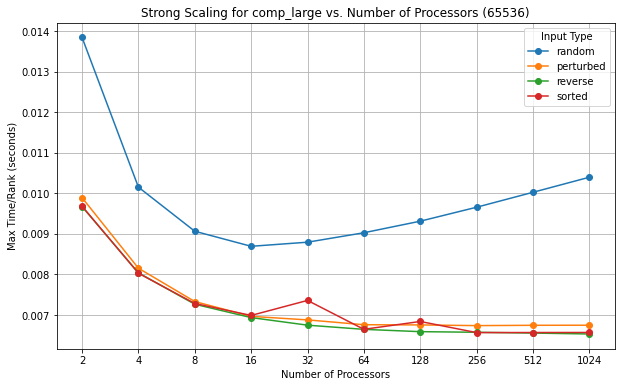

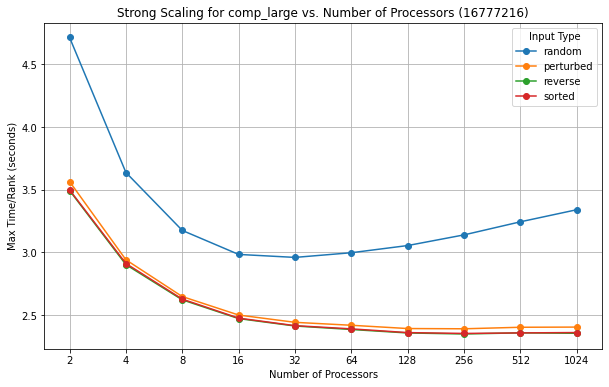

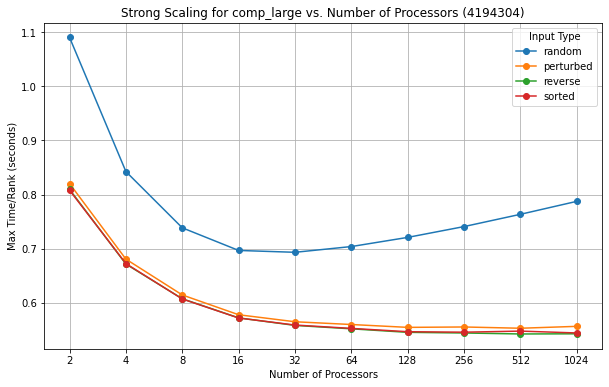

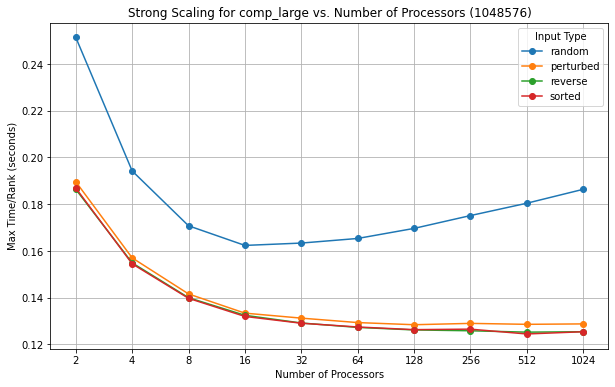

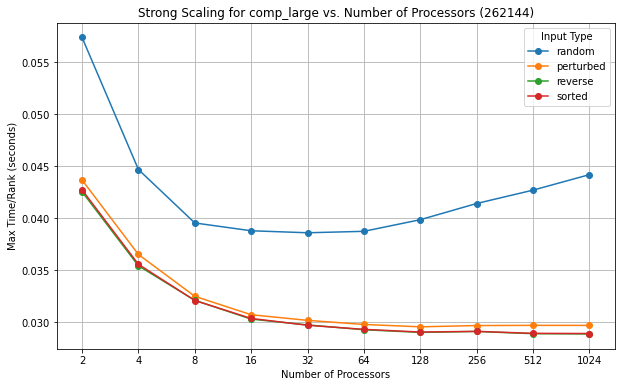

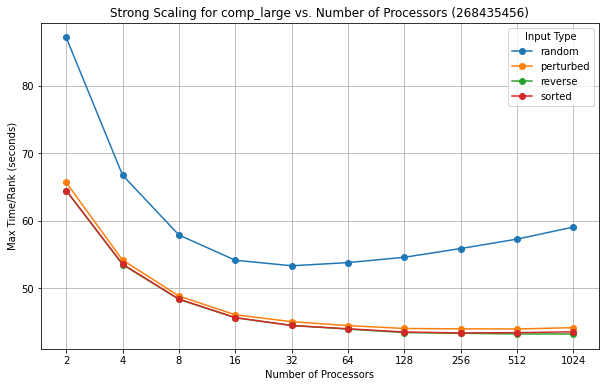

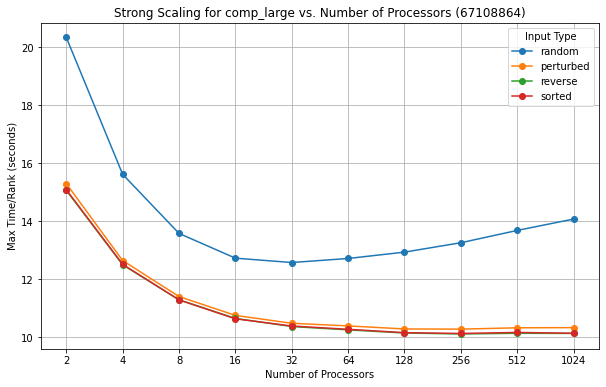

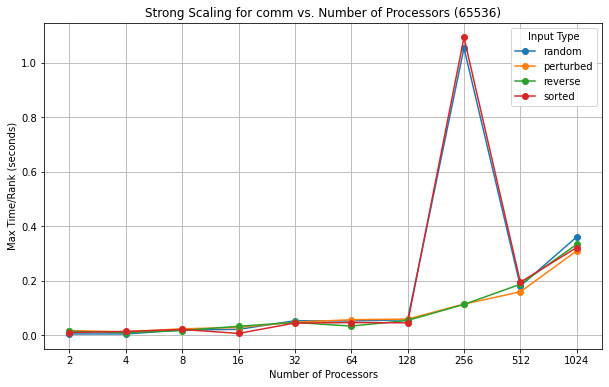

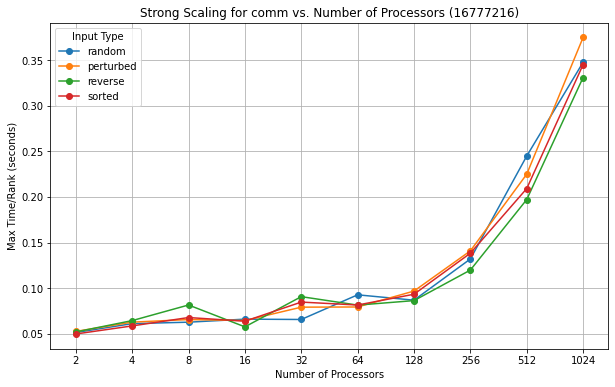

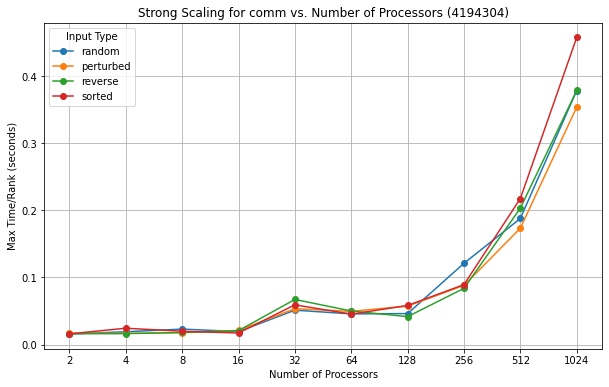

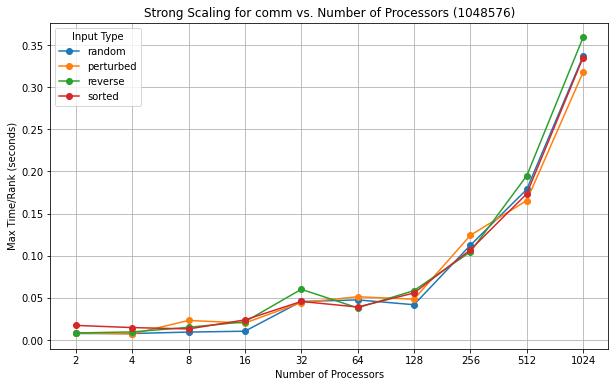

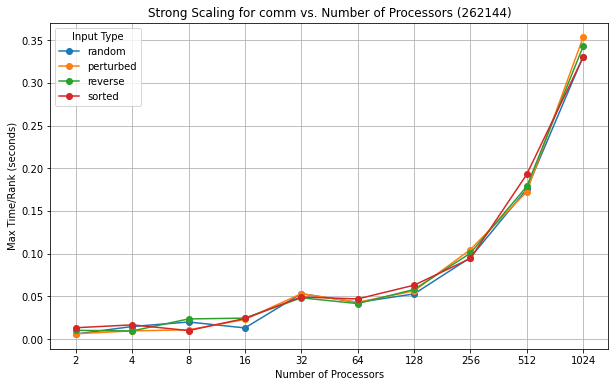

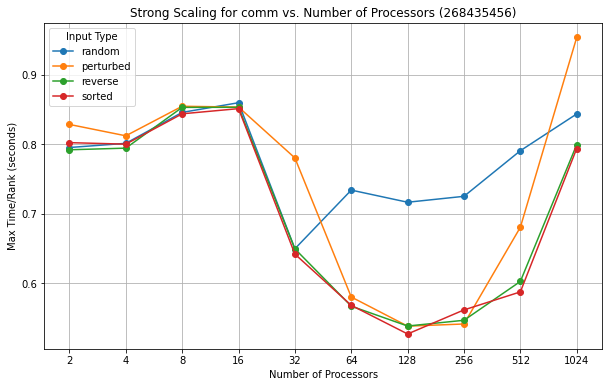

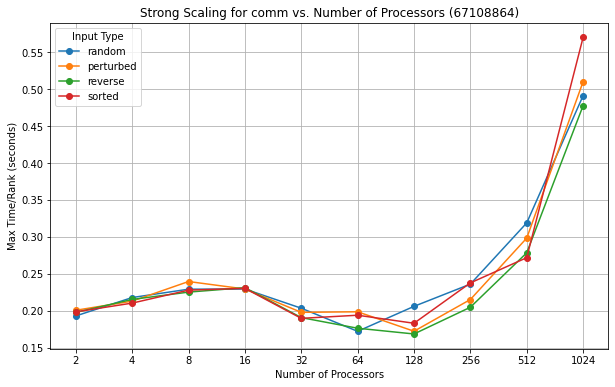

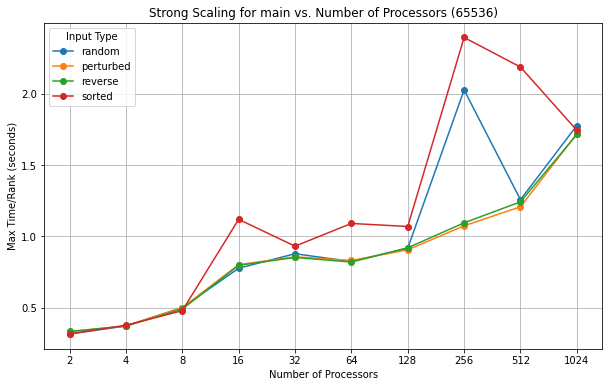

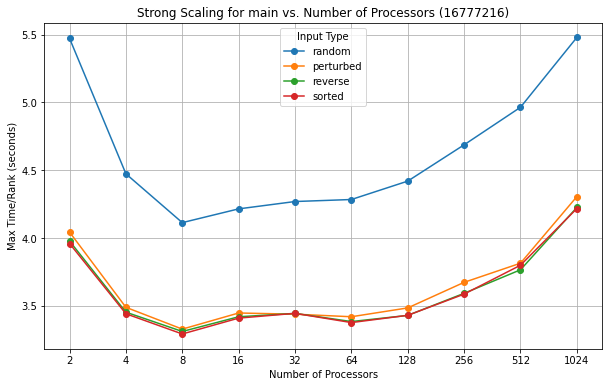

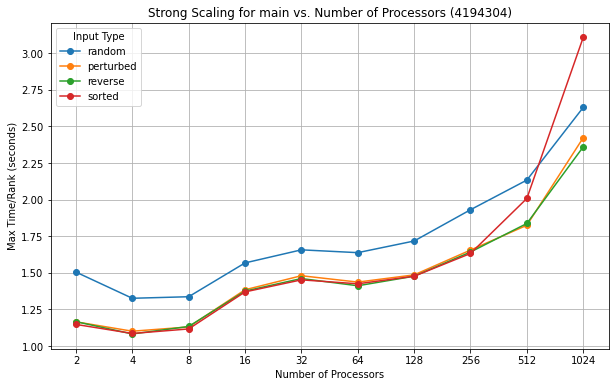

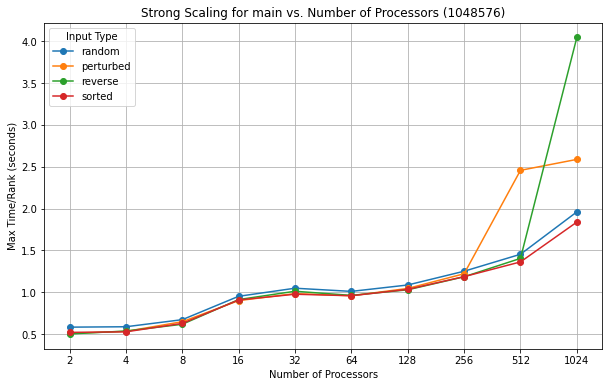

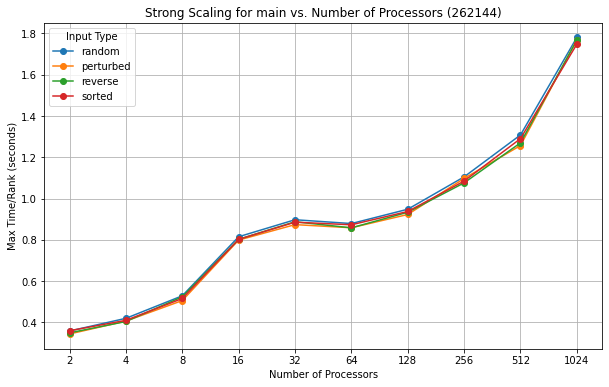

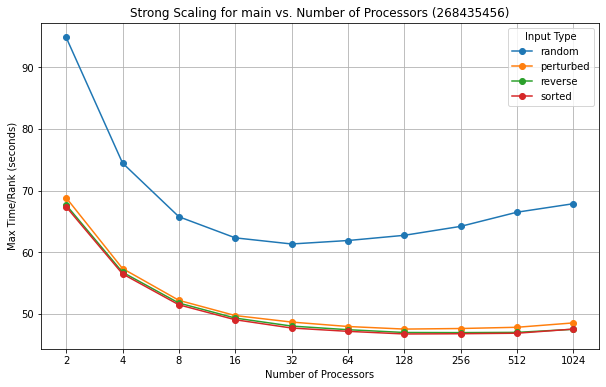

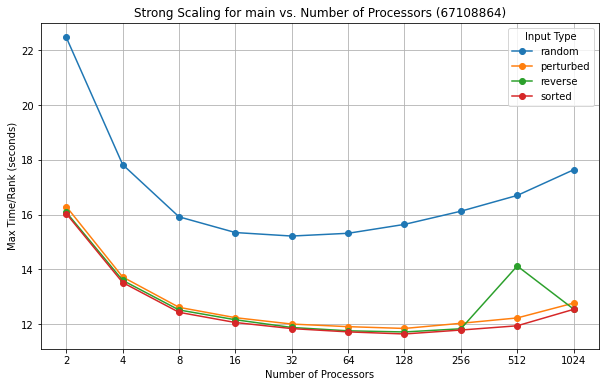

In [47]:

funcs = ["comp_large", "comm", "main"]

# want to merge metadata to dataframe to filter
df_merged = tk.dataframe.merge(tk.metadata, left_index=True, right_index=True, how='inner')

all_input_types = list(tk.metadata['input_type'].unique())
if "random" not in all_input_types:
    all_input_types.append("random")

procTicks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

tickPos = np.arange(len(procTicks))

for func in funcs:
    # after merging for dataframe, filter for that specific plot kind
    df_func = df_merged[df_merged['name'] == func]

    # in metadata, loop through each of the unique input sizes
    for input_size in df_func['input_size'].unique():
        # filter input size
        df_input_size = df_func[df_func['input_size'] == input_size]
        
        # group using `num_procs` and `input_type`, then use to get the column max time per rank
        group = df_input_size.groupby(['num_procs', 'input_type'])['Max time/rank'].max().unstack()

        # Reindex to ensure we have all input types
        group = group.reindex(columns=all_input_types, fill_value=np.nan)

        plt.figure(figsize=(10, 6))
        for column in group.columns:
            plt.plot(tickPos, group[column].reindex(procTicks).values, marker='o', label=column)

        plt.title(f"Strong Scaling for {func} vs. Number of Processors ({input_size})")
        plt.xlabel("Number of Processors")
        plt.ylabel("Max Time/Rank (seconds)")
        plt.legend(title="Input Type")
        plt.grid(True)

        plt.xticks(tickPos, procTicks)

        plt.show()


In [46]:

funcs = ["comp_large", "comm", "main"]
df_merged = tk.dataframe.merge(tk.metadata, left_index=True, right_index=True, how='inner')
input_type = "random"
input_size = 65536
procTicks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
tickPos = np.arange(len(procTicks))

for func in funcs:
    df_func = df_merged[df_merged['name'] == func]
    df_type = df_func[(df_func['input_type'] == input_type) & (df_func['input_size'] == input_size)]
    
    # 2 processor base
    if 2 in df_type['num_procs'].values:
        baseline_time = df_type[df_type['num_procs'] == 2]['Max time/rank'].values[0]
        print(f"\nFunction:'{func}', input type: '{input_type}', input size: {input_size}")

        speedup_values = {}
        for num_procs in procTicks:
            if num_procs in df_type['num_procs'].values:
                current_time = df_type[df_type['num_procs'] == num_procs]['Max time/rank'].values[0]
                speedup = baseline_time / current_time
                speedup_values[num_procs] = speedup
                print(f"Processors: {num_procs}, Speedup: {speedup:.4f}")

  



Function:'comp_large', input type: 'random', input size: 65536
Processors: 2, Speedup: 1.0000
Processors: 4, Speedup: 1.3635
Processors: 8, Speedup: 1.5269
Processors: 16, Speedup: 1.5921
Processors: 32, Speedup: 1.5738
Processors: 64, Speedup: 1.5332
Processors: 128, Speedup: 1.4863
Processors: 256, Speedup: 1.4333
Processors: 512, Speedup: 1.3807
Processors: 1024, Speedup: 1.3314

Function:'comm', input type: 'random', input size: 65536
Processors: 2, Speedup: 1.0000
Processors: 4, Speedup: 0.9848
Processors: 8, Speedup: 0.2475
Processors: 16, Speedup: 0.2206
Processors: 32, Speedup: 0.0898
Processors: 64, Speedup: 0.0910
Processors: 128, Speedup: 0.0841
Processors: 256, Speedup: 0.0045
Processors: 512, Speedup: 0.0265
Processors: 1024, Speedup: 0.0132

Function:'main', input type: 'random', input size: 65536
Processors: 2, Speedup: 1.0000
Processors: 4, Speedup: 0.8500
Processors: 8, Speedup: 0.6318
Processors: 16, Speedup: 0.4075
Processors: 32, Speedup: 0.3604
Processors: 64, Spe

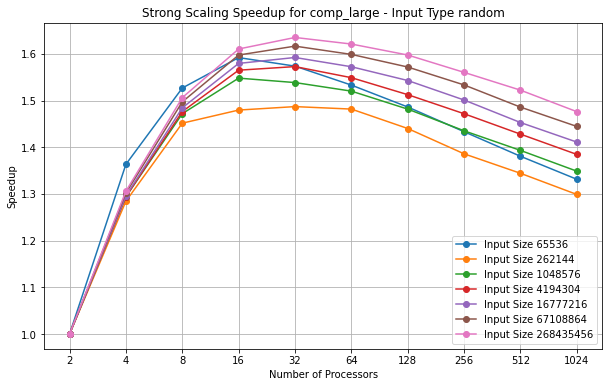

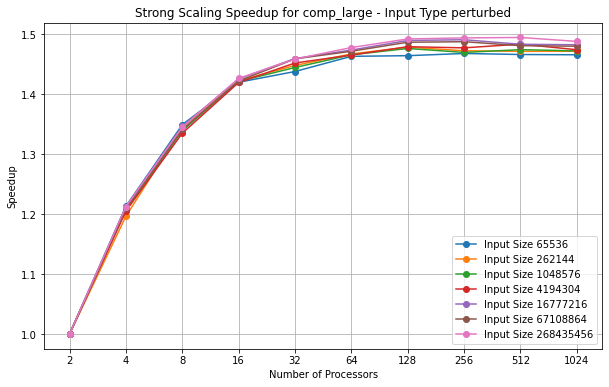

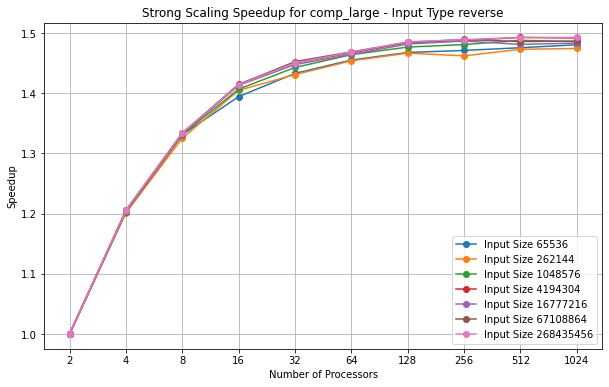

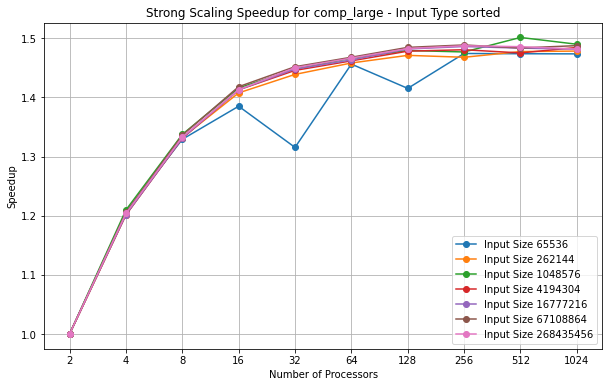

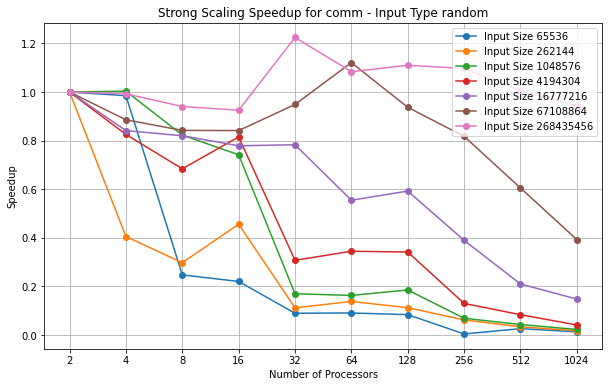

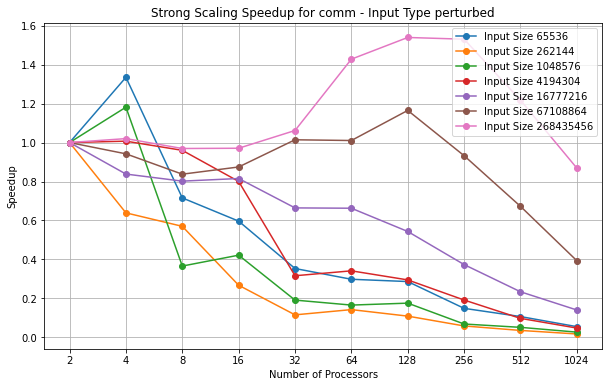

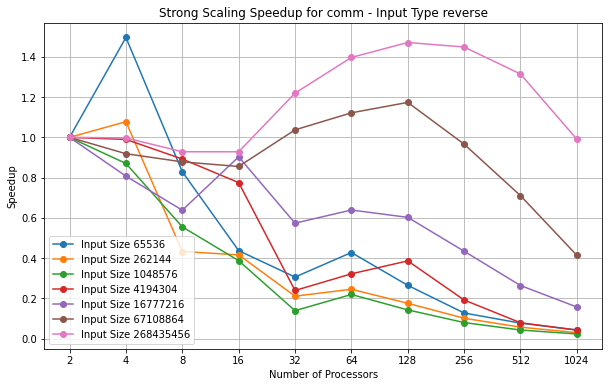

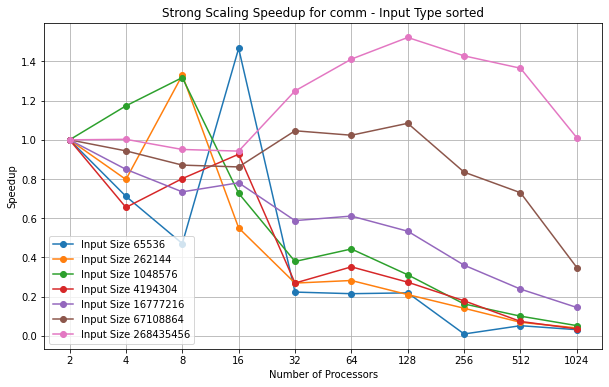

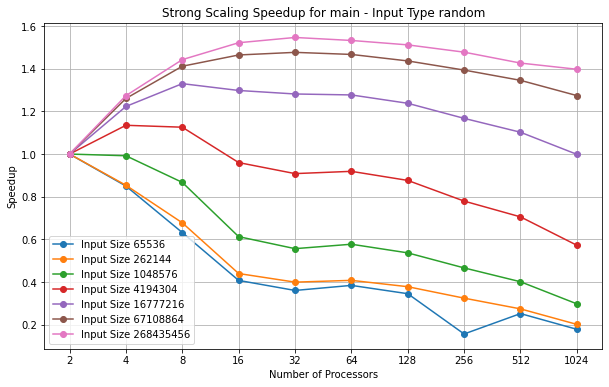

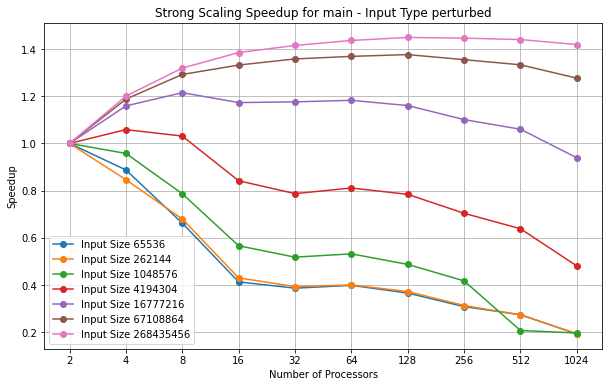

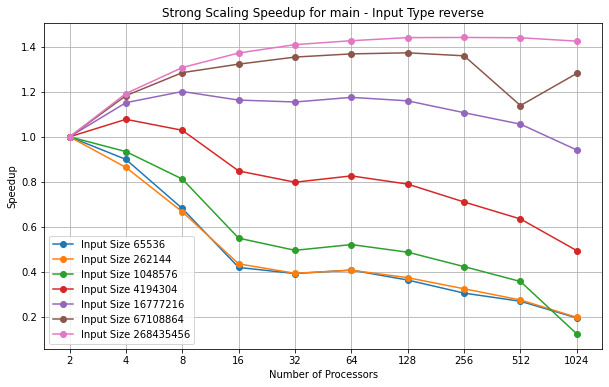

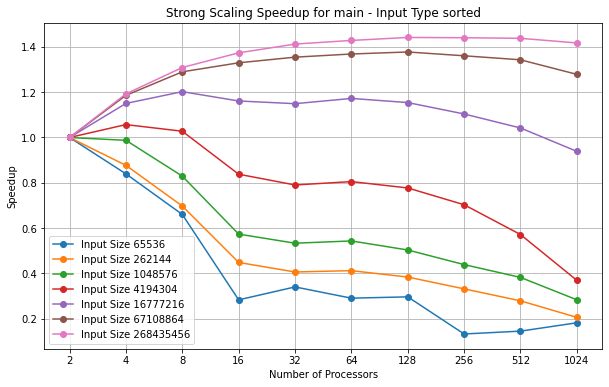

In [53]:
funcs = ["comp_large", "comm", "main"]
df_merged = tk.dataframe.merge(tk.metadata, left_index=True, right_index=True, how='inner')
input_types = df_merged['input_type'].unique()
procTicks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]
tickPos = np.arange(len(procTicks))

for func in funcs:
    df_func = df_merged[df_merged['name'] == func]
    
    for input_type in input_types:
        df_type = df_func[df_func['input_type'] == input_type]
        avail_input_sizes = sorted(df_type['input_size'].unique())
        baseline_times = {}
        
        for input_size in avail_input_sizes:
            subset = df_type[df_type['input_size'] == input_size]
            if 2 in subset['num_procs'].values:
                baseline_time = subset[subset['num_procs'] == 2]['Max time/rank'].values[0]
                baseline_times[input_size] = baseline_time
        
        plt.figure(figsize=(10, 6))
        for input_size, base_time in baseline_times.items():
            subset = df_type[df_type['input_size'] == input_size].copy()
            subset['Speedup'] = base_time / subset['Max time/rank']
            subset = subset.sort_values('num_procs')
            
            x_vals = [tickPos[procTicks.index(p)] for p in subset['num_procs'] if p in procTicks]
            y_vals = subset['Speedup'].loc[subset['num_procs'].isin(procTicks)]
            plt.plot(x_vals, y_vals, marker='o', label=f"Input Size {input_size}")
        
        plt.title(f"Strong Scaling Speedup for {func} - Input Type {input_type}")
        plt.xlabel("Number of Processors")
        plt.ylabel("Speedup")
        plt.xticks(tickPos, procTicks)
        plt.legend()
        plt.grid(True)
        plt.show()

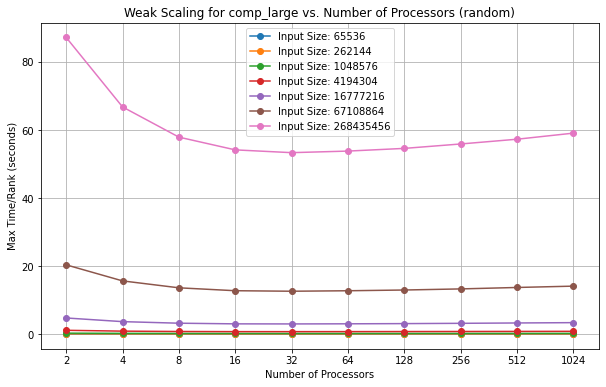

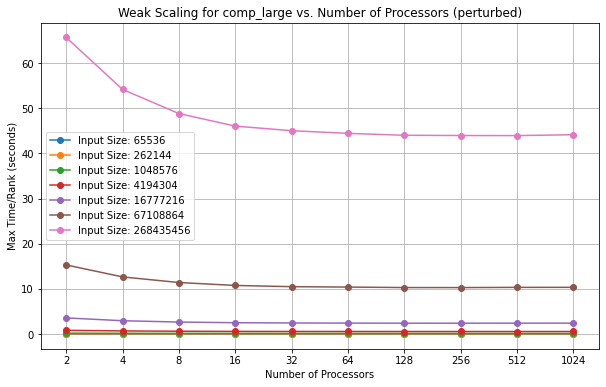

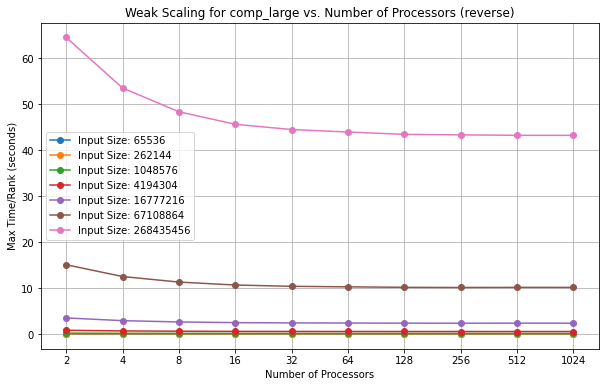

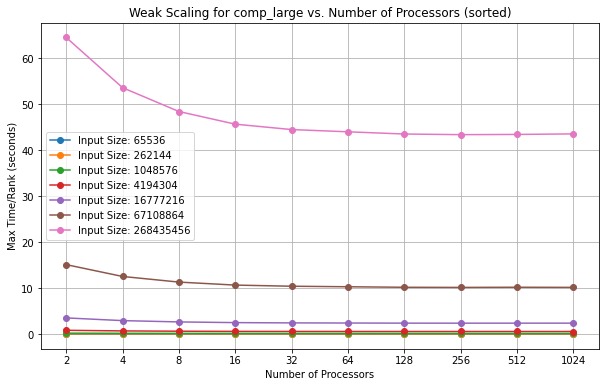

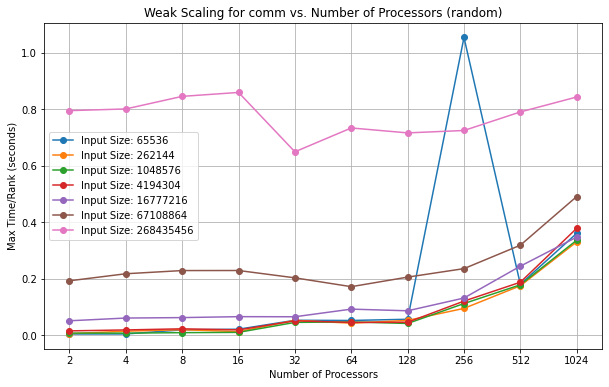

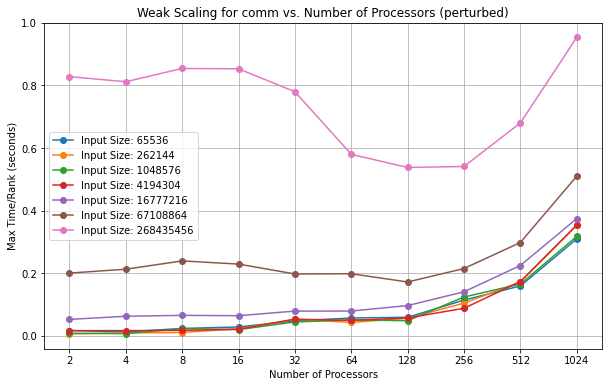

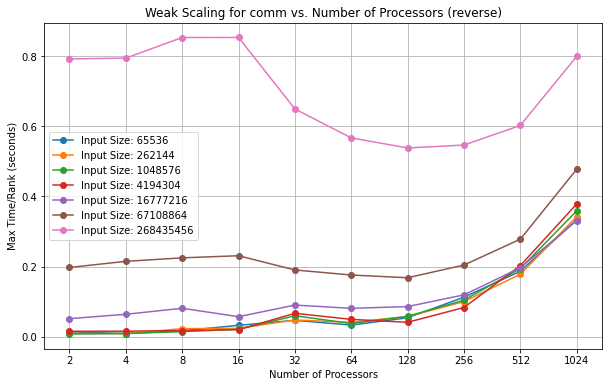

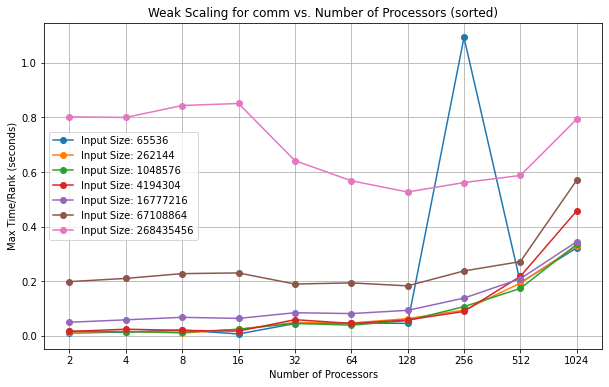

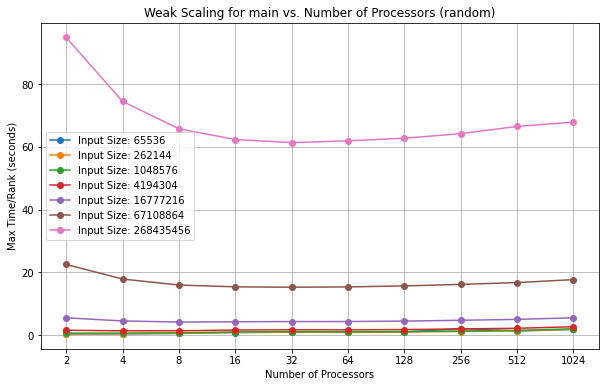

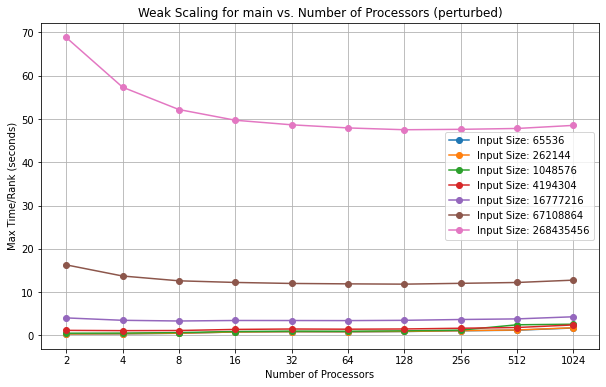

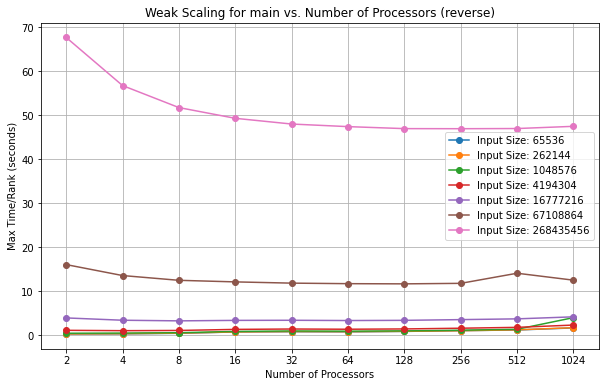

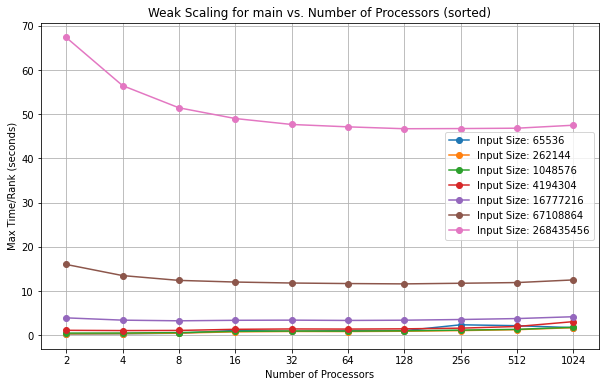

In [54]:

funcs = ["comp_large", "comm", "main"]

df_merged = tk.dataframe.merge(tk.metadata, left_index=True, right_index=True, how='inner')

input_types = df_merged['input_type'].unique()

procTicks = [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]

tickPos = np.arange(len(procTicks))

for func in funcs:

    df_func = df_merged[df_merged['name'] == func]

    for input_type in input_types:

        df_type = df_func[df_func['input_type'] == input_type]

        group = df_type.groupby(['num_procs', 'input_size'])['Max time/rank'].max().unstack()

        plt.figure(figsize=(10, 6))

        for input_size in sorted(group.columns):
  
            subset = group[input_size].reindex(procTicks)
            
            x_vals = [tickPos[procTicks.index(p)] for p in subset.dropna().index if p in procTicks]
            y_vals = subset.dropna().values
            plt.plot(x_vals, y_vals, marker='o', label=f"Input Size: {input_size}")

        plt.title(f"Weak Scaling for {func} vs. Number of Processors ({input_type})")
        plt.xlabel("Number of Processors")
        plt.ylabel("Max Time/Rank (seconds)")
        plt.xticks(tickPos, procTicks) 
        plt.legend()
        plt.grid(True)

        plt.show()


In [61]:
func_name2 = "main"
input_type2 = "random"
input_size2 = 268435456  

df_filtered = df_merged[
    (df_merged['name'] == func_name2) &
    (df_merged['input_type'] == input_type2) &
    (df_merged['input_size'] == input_size2)
]

total_time_per_proc= df_filtered.groupby('num_procs')['Total time'].sum()

print("Total time for Main (Random 268435456): ")
print(total_time_per_proc)


Total time for Main (Random 268435456): 
num_procs
2         189.692341
4         297.838364
8         525.915416
16        997.046514
32       1962.252925
64       3960.292893
128      8028.863412
256     16429.242305
512     34017.019901
1024    69459.530152
Name: Total time, dtype: float64


In [62]:
func_name2 = "main"
input_type2 = "random"
input_size2 = 65536 

df_filtered = df_merged[
    (df_merged['name'] == func_name2) &
    (df_merged['input_type'] == input_type2) &
    (df_merged['input_size'] == input_size2)
]

total_time_per_proc= df_filtered.groupby('num_procs')['Total time'].sum()

print("Total time for Main (Random 65536):")
print(total_time_per_proc)


Total time for Main (Random 65536):
num_procs
2          0.631784
4          1.488883
8          3.997280
16        12.411148
32        27.993789
64        52.607299
128      116.676100
256      516.825453
512      623.660441
1024    1776.886718
Name: Total time, dtype: float64


In [63]:
size = 2**28
func_name = "comp_large"
input_type = "random"

df_merged = tk.dataframe.merge(tk.metadata, left_index=True, right_index=True, how='inner')

df_comp_large_random = df_merged[
    (df_merged['name'] == func_name) & 
    (df_merged['input_size'] == size) & 
    (df_merged['input_type'] == input_type)
]

result = df_comp_large_random[['num_procs', 'Max time/rank']].set_index('num_procs').sort_index()

print("Comp Large (Random 2^28):")
print(result['Max time/rank'])


Comp Large (Random 2^28):
num_procs
2       87.192155
4       66.765193
8       57.884465
16      54.138910
32      53.321391
64      53.785198
128     54.576696
256     55.877619
512     57.275378
1024    59.062836
Name: Max time/rank, dtype: float64


In [64]:
size = 2**28
func_name = "comp_large"
input_type = "sorted"

df_merged = tk.dataframe.merge(tk.metadata, left_index=True, right_index=True, how='inner')

df_comp_large_sorted = df_merged[
    (df_merged['name'] == func_name) & 
    (df_merged['input_size'] == size) & 
    (df_merged['input_type'] == input_type)
]

result = df_comp_large_sorted[['num_procs', 'Max time/rank']].set_index('num_procs').sort_index()

print("Comp Large (Sorted 2^28):")
print(result['Max time/rank'])


Comp Large (Sorted 2^28):
num_procs
2       64.485832
4       53.565867
8       48.381229
16      45.632824
32      44.458210
64      43.968889
128     43.491034
256     43.352585
512     43.398703
1024    43.516029
Name: Max time/rank, dtype: float64


In [65]:
func_name = "comm"
input_type = "perturbed"
input_size = 65536

df_filtered = df_merged[
    (df_merged['name'] == func_name) &
    (df_merged['input_type'] == input_type) &
    (df_merged['input_size'] == input_size)
]

if 'Total time' in df_filtered.columns:
    total_time_values = df_filtered[['num_procs', 'Max time/rank']]
    print(f"Total time: '{func_name}', input type: '{input_type}', input size: {input_size}:")
    print(total_time_values)



Total time: 'comm', input type: 'perturbed', input size: 65536:
                                                 num_procs  Max time/rank
node                                 profile                             
{'name': 'comm', 'type': 'function'} 418287152         256       0.114317
                                     994277823           8       0.023779
                                     1135282080         16       0.028534
                                     1218912357        512       0.159444
                                     1254602696         32       0.048166
                                     2768680661         64       0.057088
                                     2968077501          4       0.012753
                                     3220890419        128       0.059426
                                     3785890459       1024       0.309704
                                     4185835109          2       0.017022
